<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics

In [2]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 5.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="E Comm",index_col=0)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain     

In [5]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [102]:
df.corrwith(df['Churn'])

Churn                          1.000000
Tenure                        -0.329355
PreferredLoginDevice           0.111639
CityTier                       0.084703
WarehouseToHome                0.066839
Gender                         0.029264
HourSpendOnApp                 0.015009
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
MaritalStatus                 -0.177987
NumberOfAddress                0.043931
Complain                       0.250188
OrderAmountHikeFromlastYear   -0.003334
CouponUsed                    -0.003854
OrderCount                    -0.029072
DaySinceLastOrder             -0.154776
CashbackAmount                -0.154118
dtype: float64

# Preparing for ML

In [104]:
df_forml = df[['Churn','Tenure','CashbackAmount','SatisfactionScore','Complain','Gender','DaySinceLastOrder']]
df_forml.head()

,Churn,Tenure,CashbackAmount,SatisfactionScore,Complain,Gender,DaySinceLastOrder
CustomerID,,,,,,,
50001,1,4.0,159.93,2,1,0,5.0
50002,1,4.0,120.90,3,1,1,0.0
50003,1,4.0,120.28,3,1,1,3.0
50004,1,0.0,134.07,5,0,1,3.0
50005,1,0.0,129.60,5,0,1,3.0


In [72]:
df.fillna(method='ffill',inplace=True)
df['PreferredLoginDevice'].replace({'Mobile Phone':-1,'Computer':1,'Phone':1},inplace=True)
df.replace({'Male':1,'Female':0},inplace=True)
df['MaritalStatus'].replace({'Married':1,'Single':-1,'Divorced':0},inplace=True)


In [105]:
df_forml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              5630 non-null   int64  
 1   Tenure             5630 non-null   float64
 2   CashbackAmount     5630 non-null   float64
 3   SatisfactionScore  5630 non-null   int64  
 4   Complain           5630 non-null   int64  
 5   Gender             5630 non-null   int64  
 6   DaySinceLastOrder  5630 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 351.9 KB


In [106]:
X = df_forml.drop('Churn',axis=1)
y = df_forml['Churn'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=30)
X_train[:5]

array([[-0.83714618, -0.85997434, -0.04839247, -0.63119754,  0.81468496,
         1.21340613],
       [-0.60357416, -0.37483803,  0.67620748, -0.63119754, -1.22746835,
         0.11958233],
       [-0.01964411,  0.36638197, -1.49759235, -0.63119754,  0.81468496,
        -0.42732956],
       [-0.48678815, -0.00961391, -0.04839247, -0.63119754, -1.22746835,
        -0.15387361],
       [ 0.56428593, -0.97277311, -0.04839247, -0.63119754,  0.81468496,
        -0.42732956]])

# ML(Logistic Regression)

In [109]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

Accuracy of LogisticReg: 0.8465909090909091 
 Jaccard score of LogisticReg: 0.2751677852348993
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1145
           1       0.70      0.31      0.43       263

    accuracy                           0.85      1408
   macro avg       0.78      0.64      0.67      1408
weighted avg       0.83      0.85      0.82      1408



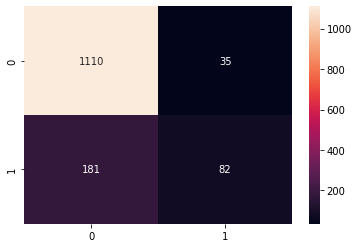

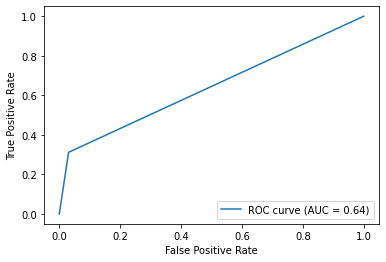

In [110]:
X_test_lg = lg_model.predict(X_test)
print('Accuracy of LogisticReg:' ,metrics.accuracy_score(y_test,X_test_lg),
     '\n Jaccard score of LogisticReg:', metrics.jaccard_score(y_test,X_test_lg))
print(metrics.classification_report(y_test,X_test_lg))

conf_mat = metrics.confusion_matrix(y_test, X_test_lg)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, X_test_lg)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# ML(K-nearest neighbors)

In [111]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Accuracy score of K-NN: 0.9225852272727273 
 Jaccard score of K-NN: 0.658307210031348 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1145
           1       0.79      0.80      0.79       263

    accuracy                           0.92      1408
   macro avg       0.87      0.87      0.87      1408
weighted avg       0.92      0.92      0.92      1408



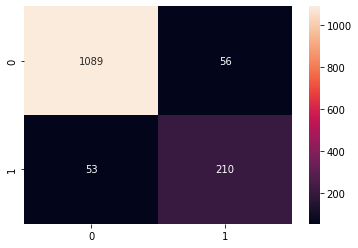

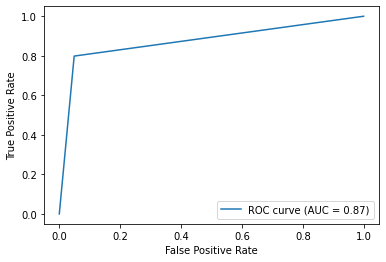

In [112]:
x_test_knn = knn.predict(X_test)
print('Accuracy score of K-NN:', metrics.accuracy_score(y_test,x_test_knn),
      '\n Jaccard score of K-NN:', metrics.jaccard_score(y_test,x_test_knn),
     '\n', metrics.classification_report(y_test,x_test_knn))

conf_mat = metrics.confusion_matrix(y_test, x_test_knn)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_knn)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [114]:
knn_gscv.best_params_

{'n_neighbors': 1}

# ML(Decision Tree)

In [119]:
tree_model = DecisionTreeClassifier(max_depth=22)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=22)

Accuracy score of Decision Tree: 0.9431818181818182 
 Jaccard score of Decision Tree: 0.735973597359736 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1145
           1       0.85      0.85      0.85       263

    accuracy                           0.94      1408
   macro avg       0.91      0.91      0.91      1408
weighted avg       0.94      0.94      0.94      1408



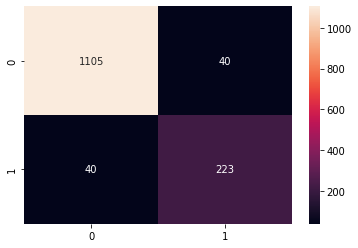

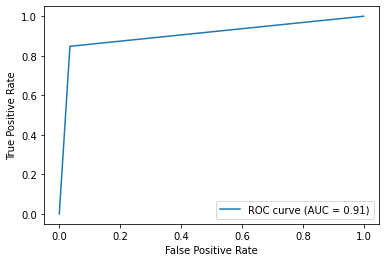

In [120]:
x_tree = tree_model.predict(X_test)
print('Accuracy score of Decision Tree:', metrics.accuracy_score(y_test,x_tree),
      '\n Jaccard score of Decision Tree:', metrics.jaccard_score(y_test,x_tree),
     '\n', metrics.classification_report(y_test,x_tree))

conf_mat = metrics.confusion_matrix(y_test, x_tree)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, x_tree)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(1, 25)}

tree_gscv = GridSearchCV(tree_model, param_grid, cv=5)

tree_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=21),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [118]:
tree_gscv.best_params_

{'max_depth': 22}

# ML(Random Forest)

In [125]:
forest = RandomForestClassifier(n_estimators=44)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=44)

Accuracy score of Random Forest: 0.9367897727272727 
 Jaccard score of Random Forest: 0.7033333333333334 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1145
           1       0.85      0.80      0.83       263

    accuracy                           0.94      1408
   macro avg       0.90      0.88      0.89      1408
weighted avg       0.94      0.94      0.94      1408



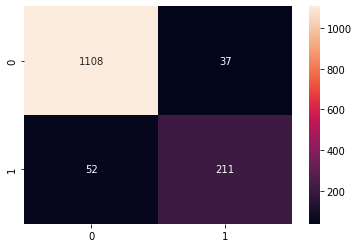

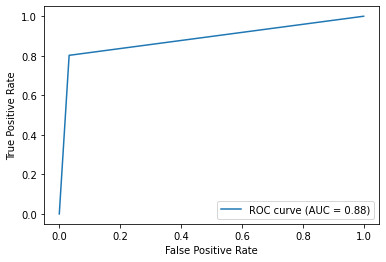

In [126]:
x_forest = forest.predict(X_test)
print('Accuracy score of Random Forest:', metrics.accuracy_score(y_test,x_forest),
      '\n Jaccard score of Random Forest:', metrics.jaccard_score(y_test,x_forest),
     '\n', metrics.classification_report(y_test,x_forest))

conf_mat = metrics.confusion_matrix(y_test, x_forest)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, x_forest)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


In [123]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(1, 50)}

forest_gscv = GridSearchCV(forest, param_grid, cv=5)

forest_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=32),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [124]:
forest_gscv.best_params_

{'n_estimators': 44}

# ML(Support Vector Machines)

In [127]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

Accuracy score of Random Forest: 0.8522727272727273 
 Jaccard score of Random Forest: 0.31125827814569534 
               precision    recall  f1-score   support

           0       0.87      0.97      0.91      1145
           1       0.71      0.36      0.47       263

    accuracy                           0.85      1408
   macro avg       0.79      0.66      0.69      1408
weighted avg       0.84      0.85      0.83      1408



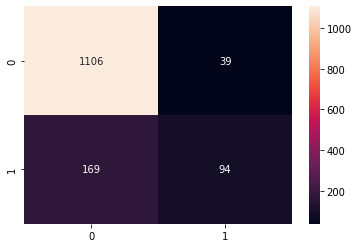

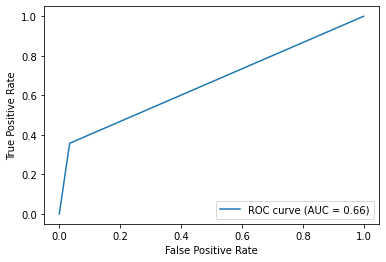

In [128]:
x_svc = svc.predict(X_test)
print('Accuracy score of Random Forest:', metrics.accuracy_score(y_test,x_svc),
      '\n Jaccard score of Random Forest:', metrics.jaccard_score(y_test,x_svc),
     '\n', metrics.classification_report(y_test,x_svc))

conf_mat = metrics.confusion_matrix(y_test, x_svc)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, x_svc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# XGBoost

In [67]:
from xgboost import XGBClassifier

In [129]:
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)

XGBClassifier()

Accuracy score of XGBoost: 0.8735795454545454 
 Jaccard score of XGBoost: 0.43670886075949367 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1145
           1       0.72      0.52      0.61       263

    accuracy                           0.87      1408
   macro avg       0.81      0.74      0.77      1408
weighted avg       0.86      0.87      0.87      1408



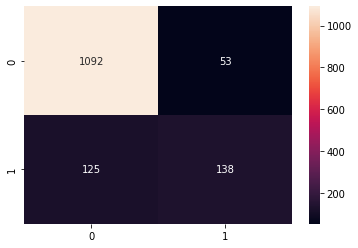

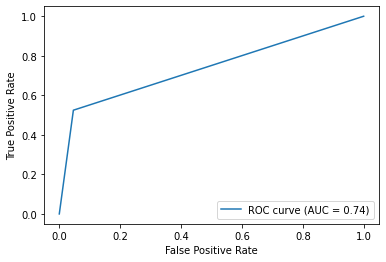

In [130]:
x_gboost = xgboost.predict(X_test)
print('Accuracy score of XGBoost:', metrics.accuracy_score(y_test,x_gboost),
      '\n Jaccard score of XGBoost:', metrics.jaccard_score(y_test,x_gboost),
     '\n', metrics.classification_report(y_test,x_gboost))

conf_mat = metrics.confusion_matrix(y_test, x_gboost)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()


fpr, tpr, thresholds = metrics.roc_curve(y_test, x_gboost)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()